In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes/Registro de Nubes')
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1bUVmxKZXlCNnu4CbA53Po31b084HWCvL/Registro de Nubes


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_pc_by_class(num_point_Clouds, num_points, clase, inicial_path):

  lista = []
  path_i = inicial_path + '/' + clase + '/' + clase +'_'
  
  for i in range(1, num_point_Clouds+1):
    if(i<10):
      path = path_i + '00' + str(0)+str(i) + '.txt'
    if(i>=10 and i<100):
      path = path_i + '00' + str(i) + '.txt'
    if(i>=100 and i<1000):
      path = path_i + '0' + str(i) + '.txt'
    if(i>=1000):
      path = path_i + str(i) + '.txt'
    pC = np.loadtxt(path, delimiter=',', usecols=(0,1,2))
    pC = pC[:num_points, :]
    lista.append(pC)



  return lista

In [4]:
os.chdir('/content/drive/MyDrive/PROYECTO DE GRADO/Code/DPDist-master/log/test1__imp_type_1enc_3dmfvEmbS512BN0LR0001wd0sigma125K5AUG1lsl1_distnoise0chairov1np64')
!pwd

/content/drive/.shortcut-targets-by-id/1asBEAN-S2b77S-W1swprmpEcUXwsqzS3/PROYECTO DE GRADO/Code/DPDist-master/log/test1__imp_type_1enc_3dmfvEmbS512BN0LR0001wd0sigma125K5AUG1lsl1_distnoise0chairov1np64


In [5]:
chair = read_pc_by_class(2, 10000, 'chair', '../../data/modelnet40_normal_resampled')

In [6]:
NUBE = chair[0][:1024]

In [7]:
os.chdir('/content/drive/MyDrive/PROYECTO DE GRADO/Code')

In [8]:
!pip install plyfile #Libreria para almacenar datos tridimensionales de escáneres 3D. 

In [9]:
from plyfile import PlyData, PlyElement #Libreria para almacenar datos tridimensionales de escáneres 3D. 
import numpy as np
import cv2 #Librería para problemas de visión por computador
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [76]:
plydata = PlyData.read('Data/bunny/reconstruction/bun_zipper.ply')

In [77]:
plydata.elements[0].data
#Al parecer las primeras 3 primeras columnas son las coordenadas x y z del punto, las otras dos no sé que serán (parecen ser confidence e intensity)

array([(-0.0378297, 0.12794 ,  0.00447467, 0.850855, 0.5     ),
       (-0.0447794, 0.128887,  0.00190497, 0.900159, 0.5     ),
       (-0.0680095, 0.151244,  0.0371953 , 0.398443, 0.5     ), ...,
       (-0.0704544, 0.150585, -0.0434585 , 0.224465, 0.337855),
       (-0.0310262, 0.153728, -0.00354608, 0.167698, 0.5     ),
       (-0.0400442, 0.15362 , -0.00816685, 0.734503, 0.5     )],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('confidence', '<f4'), ('intensity', '<f4')])

In [78]:
points = []
for point in plydata.elements[0].data:
    points.append([point[0], point[1], point[2]])
points = np.array(points)
colors = np.zeros_like(points)

In [79]:
Xpoints = []
Ypoints = []
Zpoints = []
for i in range(len(points)):
  Xpoints.append(points[i,0])
  Ypoints.append(points[i,1])
  Zpoints.append(points[i,2])

In [80]:
Narray=np.array([Xpoints, Ypoints, Zpoints])
Narray.shape

(3, 35947)

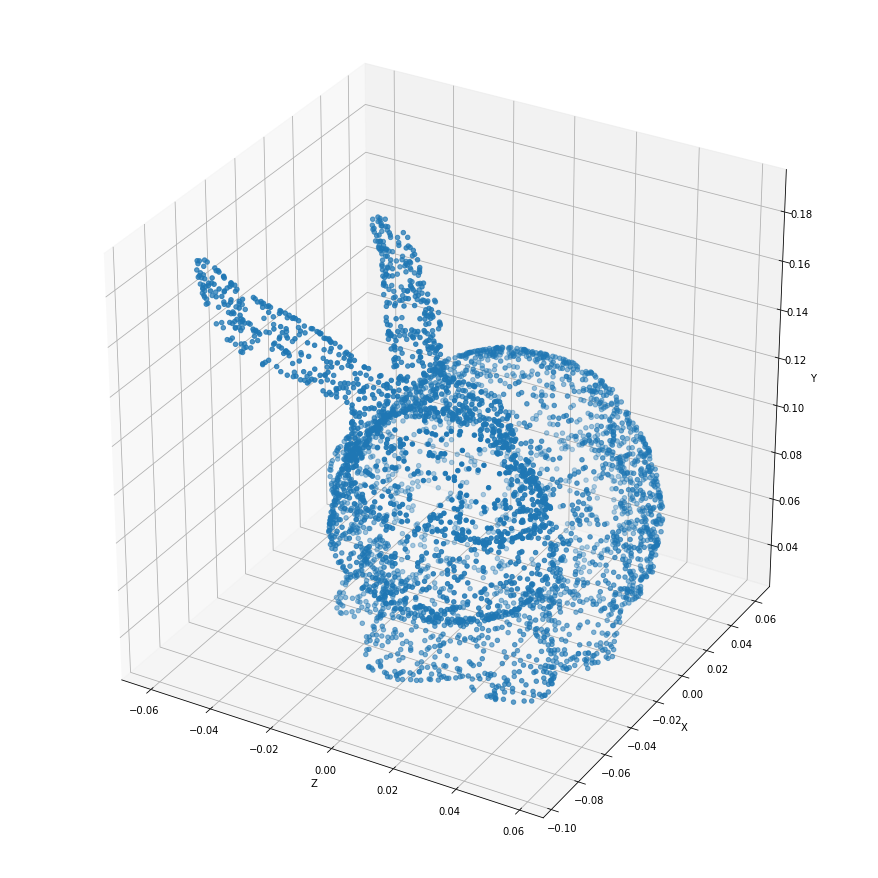

In [87]:
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
v= points
np.random.shuffle(v)
ax = m3d.Axes3D(plt.figure(figsize=(12,12)))
X = v[:1024*4,0]
Y = v[:1024*4,1]
Z = v[:1024*4,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
plt.show()

In [57]:
v

array([[-0.07175  ,  0.103386 ,  0.0380331],
       [ 0.04925  ,  0.0671241,  0.0270832],
       [-0.06475  ,  0.113439 ,  0.0400781],
       ...,
       [ 0.02225  ,  0.0788836,  0.0500967],
       [-0.04225  ,  0.102178 ,  0.0413379],
       [-0.0705   ,  0.0972214,  0.0413331]], dtype=float32)

In [58]:
Nx = (np.max(v[:,0]) - np.min(v[:,0]))/0.5
Ny = (np.max(v[:,1]) - np.min(v[:,1]))/0.5
Nz = (np.max(v[:,2]) - np.min(v[:,2]))/0.5

In [59]:
np.mean(v)

0.03606528

In [60]:
Nx

0.31150001287460327

In [20]:
v

array([[ 48.34757  ,  49.22262  , -11.556393 ],
       [ 13.184487 ,  67.79222  , -14.558119 ],
       [-42.700943 ,  64.53304  , -23.13448  ],
       ...,
       [-26.695602 ,  11.610838 ,   1.7369716],
       [ 33.872684 , -48.67496  ,   3.8810666],
       [ 18.17515  ,  30.227585 ,  11.17097  ]], dtype=float32)

In [21]:
grid = []
for i in range(len(v)):
  if(v[i,0]<=int(Nx) and v[i,1]<=int(Ny) and v[i,2]<=int(Nz)):
    grid.append(v[i])
Grid = np.array(grid)

In [22]:
Grid.shape

(172974, 3)

(172974,) (172974,) (172974,)


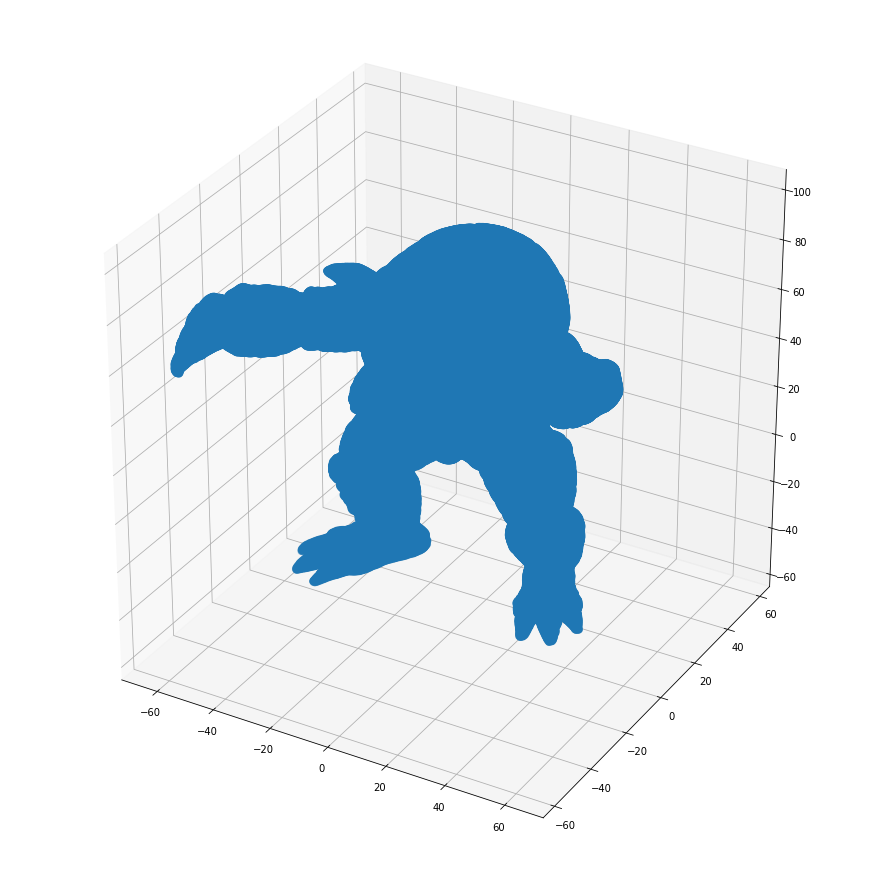

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
v= Grid
ax = m3d.Axes3D(plt.figure(figsize=(12,12)))
X = v[:,0]
Y = v[:,1]
Z = v[:,2]
print(X.shape, Y.shape, Z.shape)
ax.scatter3D(X,Z,Y)
plt.show()

In [24]:
from scipy import signal as sig
import numpy as np
from scipy.ndimage import gaussian_filter
def gradient_x(point_cloud):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernel_x2 = np.array([[-2, 0, 2],[-4, 0, 4],[-2, 0, 2]])
    kernel_x3 = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernel_X = []
    for i in range(1):
      kernel_X.append(kernel_x)
      kernel_X.append(kernel_x2)
      kernel_X.append(kernel_x3)
    Kernel_X = np.array(kernel_X)
    conv1 = sig.convolve(point_cloud, kernel_x, mode='same')
    conv2 =sig.convolve(point_cloud, kernel_x2, mode='same')
    conv3 =sig.convolve(point_cloud, kernel_x3, mode='same')
    return np.sqrt(conv1**2 + conv2**2 + conv3**2)

def gradient_y(point_cloud):
    ##Sobel operator kernels.
    kernel_y = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    kernel_y2 = np.array([[2, 4, 2],[0, 0, 0],[-2, -4, -2]])
    kernel_y3 = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    kernel_Y = []
    for i in range(1):
      kernel_Y.append(kernel_y)
      kernel_Y.append(kernel_y2)
      kernel_Y.append(kernel_y3)
    Kernel_Y = np.array(kernel_Y)
    conv1 = sig.convolve(point_cloud, kernel_y, mode='same')
    conv2 =sig.convolve(point_cloud, kernel_y2, mode='same')
    conv3 =sig.convolve(point_cloud, kernel_y3, mode='same')
    return np.sqrt(conv1**2 + conv2**2 + conv3**2)

def gradient_z(point_cloud):
    ##Sobel operator kernels.
    kernel_z = np.array([[-1, -2, -1],[-2, -4, -2],[-1, -2, -1]])
    kernel_z2 = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]])
    kernel_z3 = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
    kernel_Z = []
    for i in range(1):
      kernel_Z.append(kernel_z)
      kernel_Z.append(kernel_z2)
      kernel_Z.append(kernel_z3)
    Kernel_Z = np.array(kernel_Z)
    conv1 = sig.convolve(point_cloud, kernel_z, mode='same')
    conv2 =sig.convolve(point_cloud, kernel_z2, mode='same')
    conv3 =sig.convolve(point_cloud, kernel_z3, mode='same')
    return np.sqrt(conv1**2 + conv2**2 + conv3**2)

I_x = gradient_x(NUBE)
I_y = gradient_y(NUBE)
I_z = gradient_z(NUBE)

In [25]:
def jrHarris3d(point_cloud):
  NUBE = point_cloud
  I_x = gradient_x(NUBE)
  I_y = gradient_y(NUBE)
  I_z = gradient_z(NUBE)
  Ixx = gaussian_filter(I_x**2, sigma=1)
  Ixy = gaussian_filter(I_x*I_y, sigma=1)
  Iyy = gaussian_filter(I_y**2, sigma=1)
  Izz = gaussian_filter(I_z**2, sigma=1)
  Ixz = gaussian_filter(I_x*I_z, sigma=1)
  Iyz = gaussian_filter(I_y*I_z, sigma=1)

  M = np.array([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])
  trace = np.trace(M)
 
  
  det = np.linalg.det(M[:,:,0,0])

  k= 0.005
  harris_response = det - k * trace ** 3

  indexcol = []
  indexrow = []
  R=[]
  for rowindex, response in enumerate(harris_response):
      for colindex, r in enumerate(response):
        R.append(r)
        indexrow.append(rowindex)
        indexcol.append(colindex)
  R3=[R[i:i + 3] for i in range(0, len(R), 3)]
  indexcol3=[indexcol[i:i + 3] for i in range(0, len(indexcol), 3)]
  indexrow3=[indexrow[i:i + 3] for i in range(0, len(indexrow), 3)]

  

  img_copy_for_corners = np.copy(NUBE)
  img_copy_for_edges = np.copy(NUBE)
  NN=[]
  l= sorted(R3,reverse=True)
  H=[]
  import pandas as pd

  data_dict = {'R': pd.Series(R3),
              'fila': pd.Series(indexrow),
               'columna': pd.Series(indexcol),}

  df = pd.DataFrame(data_dict)

  #df2 = df.sort_values('one', ascending = False)

  '''
  #df3= df2[["two", "three"]][:600]
  '''
  NN = np.ones((NUBE.shape[0],3))
  df2 = df.sort_values('R', ascending = False)
  df2= df2.reset_index()

  for i in range(1024):
    if(df2['R'][i][0] > 0 and df2['R'][i][1] > 0 and df2['R'][i][2] > 0):
      NN[df2['fila'][i]][df2['columna'][i]]=img_copy_for_corners[df2['fila'][i], df2['columna'][i]]

  MM = []
  for i in range(len(NN)):
    if(NN[i][0]!=1 and NN[i][1]!=1 and NN[i][2]!=1):
      MM.append(NN[i])
  MM = np.array(MM)
  return MM

In [26]:
#NUBE = v
NUBE = v


In [27]:
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
pcaNUBE = PCA(n_components=1).fit_transform(NUBE)


In [28]:
NN = jrHarris3d(NUBE)

In [29]:
len(NN)

54

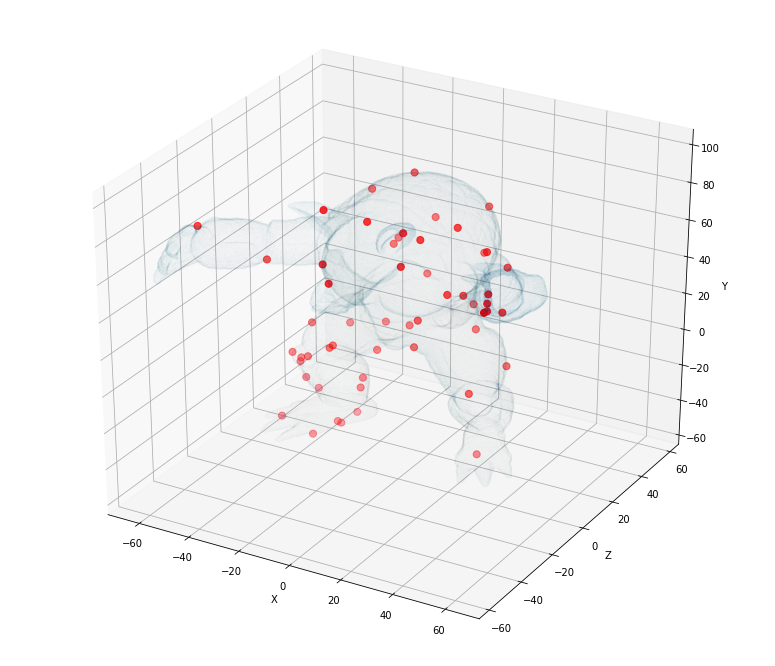

In [30]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = NUBE[:,0]
Y = NUBE [:,1]
Z = NUBE[:,2]
ax.scatter3D(X,Z,Y, s=0.0001)
X = NN[:,0]
Y = NN [:,1]
Z = NN[:,2]
ax.scatter3D(X,Z,Y, c='r', s=50)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
plt.show()

In [31]:
import math
from functools import reduce
import numpy as np
def rotacionZYX(radz, rady, radx):
  Ms = []
  z= radz
  y= rady
  x= radx

  cosz = math.cos(z)
  sinz = math.sin(z)
  Ms.append(np.array(
          [[cosz, -sinz, 0],
            [sinz, cosz, 0],
            [0, 0, 1]]))

  cosy = math.cos(y)
  siny = math.sin(y)
  Ms.append(np.array(
          [[cosy, 0, siny],
            [0, 1, 0],
            [-siny, 0, cosy]]))

  cosx = math.cos(x)
  sinx = math.sin(x)
  Ms.append(np.array(
          [[1, 0, 0],
            [0, cosx, -sinx],
            [0, sinx, cosx]]))


  Mzxy = reduce(np.dot, Ms[::-1])
  return Mzxy

In [32]:

Rm = rotacionZYX(-np.pi/2,np.pi/3, np.pi/4)
NUBEROTADA= np.dot(Rm, NUBE.T).T


In [33]:
NN2 = jrHarris3d(NUBEROTADA)

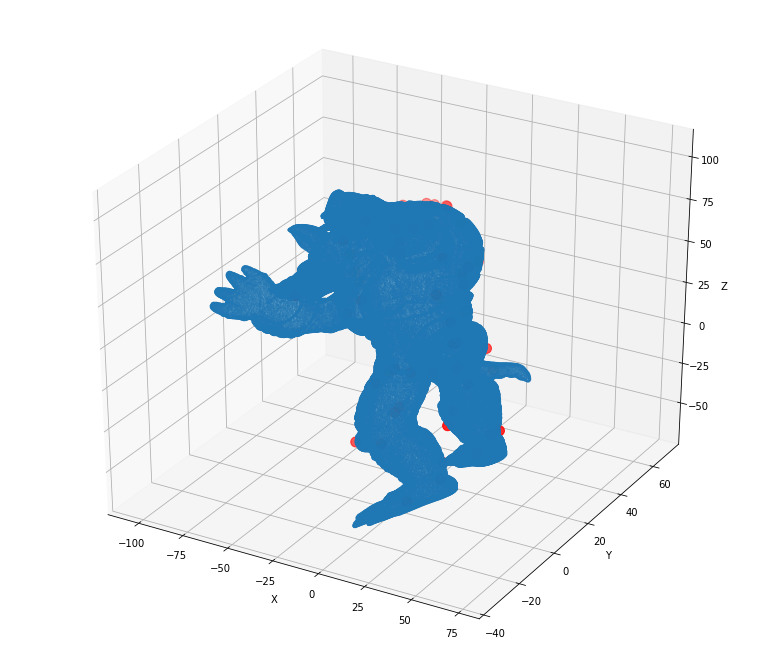

In [34]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = NUBEROTADA[:,0]
Y = NUBEROTADA [:,1]
Z = NUBEROTADA[:,2]
ax.scatter3D(Z,X,Y, s=0.5)
X = NN2[:,0]
Y = NN2 [:,1]
Z = NN2[:,2]
ax.scatter3D(Z,X,Y, c='r', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

 ### Punto p0 de NN es igual al punto p0 de NN2?

In [35]:

Rm = rotacionZYX(np.pi/2,0,0)
NUBEROTADA3= np.dot(Rm, NUBE.T).T


In [36]:
NN3 = jrHarris3d(NUBEROTADA3)

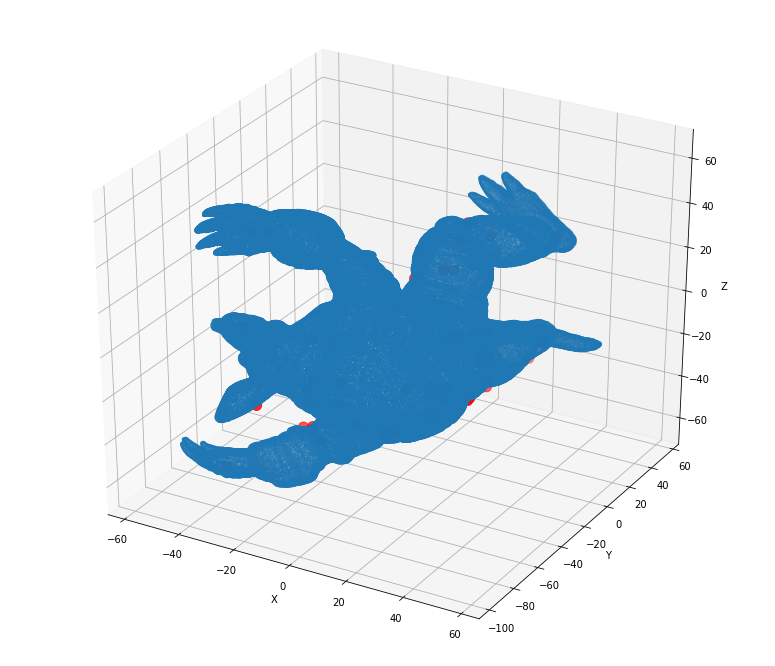

In [37]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = NUBEROTADA3[:,0]
Y = NUBEROTADA3 [:,1]
Z = NUBEROTADA3[:,2]
ax.scatter3D(Z, X, Y, s=0.5)
X = NN3[:,0]
Y = NN3 [:,1]
Z = NN3[:,2]
ax.scatter3D(Z, X, Y, c='r', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [38]:
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [39]:
matches12 = match_descriptors(NN, NN2, metric='mahalanobis', cross_check=True)

In [40]:
matches12

array([[ 1, 19],
       [ 4, 27],
       [10, 48],
       [13, 37],
       [14,  6],
       [19, 49],
       [24,  5],
       [26, 15],
       [27, 30],
       [29, 47],
       [33, 45],
       [34, 21],
       [36, 50],
       [40,  0],
       [44, 33],
       [48, 52],
       [49, 41]])

In [41]:
matches12[:, 0] 

array([ 1,  4, 10, 13, 14, 19, 24, 26, 27, 29, 33, 34, 36, 40, 44, 48, 49])

In [42]:
matches12[:, 1] 

array([19, 27, 48, 37,  6, 49,  5, 15, 30, 47, 45, 21, 50,  0, 33, 52, 41])

In [43]:
matches12[0, 1] 

19

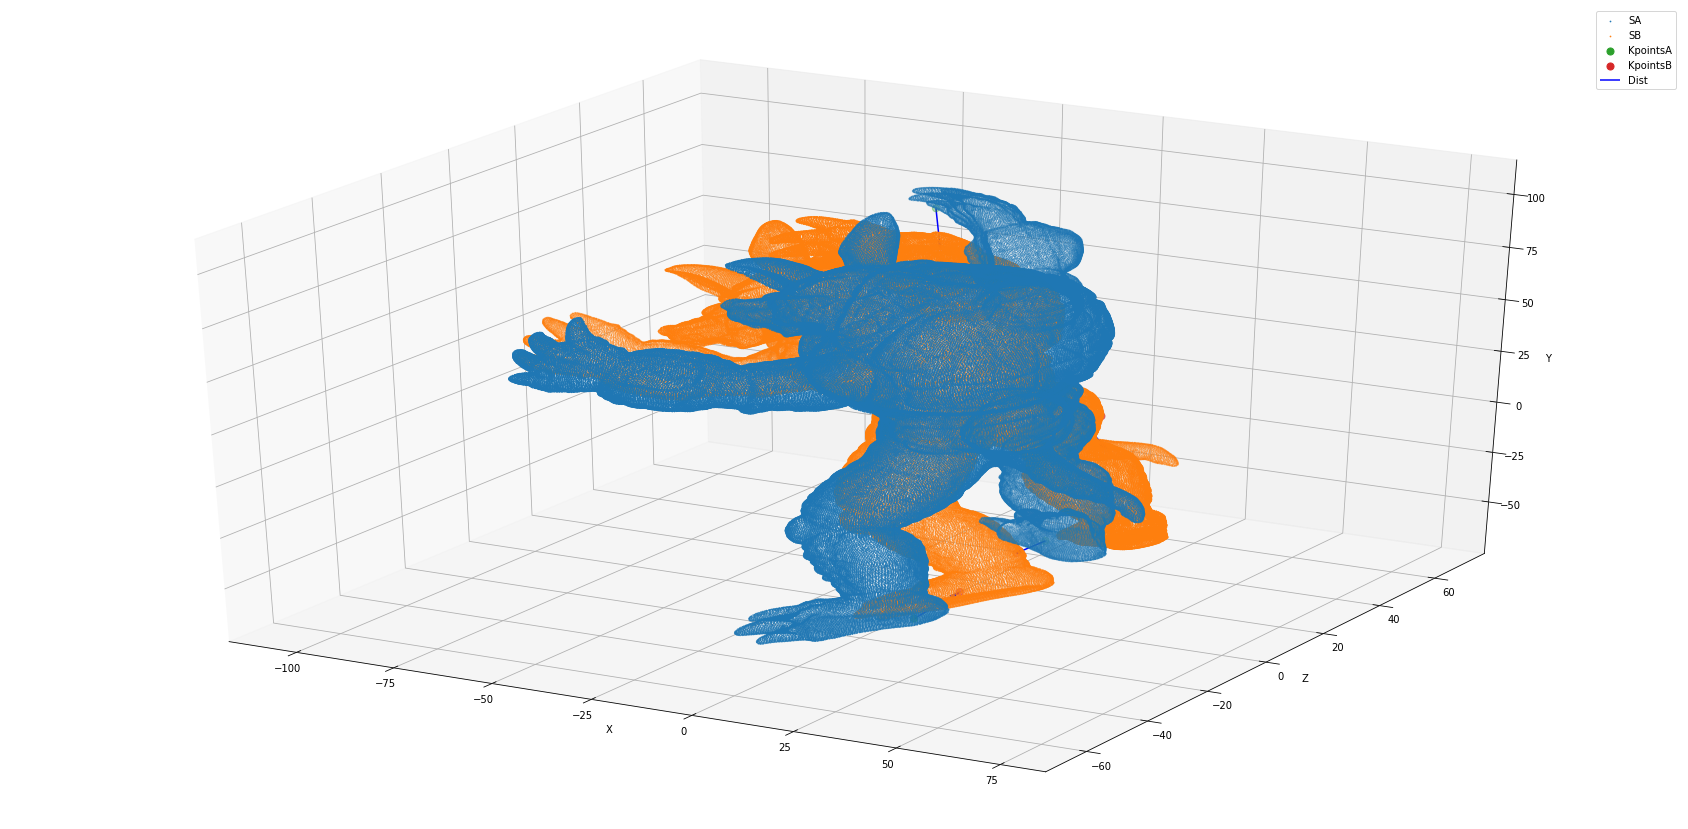

In [44]:
import numpy as np
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(projection='3d')
X = NUBE[:,0]
Y = NUBE [:,1]
Z = NUBE[:,2]
ax.scatter3D(Z, X, Y, s=0.5)
X = NUBEROTADA[:,0]
Y = NUBEROTADA [:,1]
Z = NUBEROTADA[:,2]
ax.scatter3D(Z, X, Y, s=0.5)

X1 = NN[matches12[:, 0] ,0]
Y1 = NN[matches12[:, 0] ,1]
Z1 = NN[matches12[:, 0] ,2]
ax.scatter3D(Z1, X1, Y1, s=50)


X2 = NN2[matches12[:, 1] ,0]
Y2 = NN2[matches12[:,1] ,1]
Z2 = NN2[matches12[:, 1] ,2]
ax.scatter3D(Z2, X2, Y2, s=50)


for i in range(len(matches12)):
  ax.quiver(Z1[i], X1[i], Y1[i], Z2[i]-Z1[i], X2[i]-X1[i], Y2[i]-Y1[i], arrow_length_ratio=0.2, color='b')
  #ax.quiNUBEer(Z1[1], X1[1], Y1[1], Z2[2]-Z1[1], X2[2]-X1[1], Y2[2]-Y1[1], arrow_length_ratio=0.2, color='b') 

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend(['SA','SB','KpointsA', 'KpointsB','Dist'])

plt.show()

In [45]:
from sklearn.neighbors import NearestNeighbors
def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()

In [46]:
p1 = np.array([[1,1,1], [1,6,1], [4,5,6]])
p2 = np.array([[2,3,2], [2,4,2], [1,2,3]])

In [47]:
d, i =nearest_neighbor(p1, p2)
print(d)
print('____________________________________')
print(i)

[2.23606798 2.44948974 4.58257569]
____________________________________
[2 1 1]


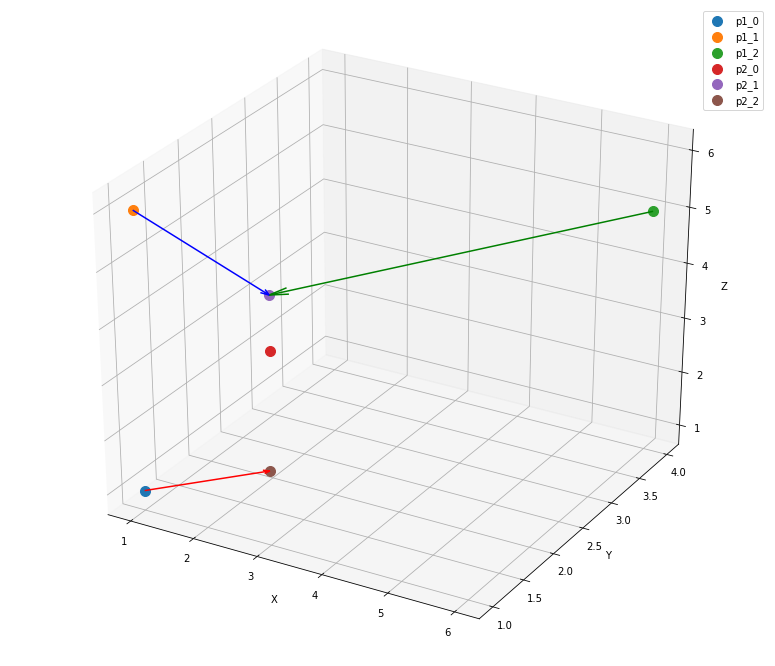

In [48]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X1_0 = p1[0,0]
Y1_0 = p1[0,1]
Z1_0 = p1[0,2]
ax.scatter3D(Z1_0, X1_0, Y1_0, s=100)
X1_1 = p1[1,0]
Y1_1 = p1[1,1]
Z1_1 = p1[1,2]
ax.scatter3D(Z1_1, X1_1, Y1_1, s=100)
X1_2 = p1[2,0]
Y1_2 = p1[2,1]
Z1_2 = p1[2,2]
ax.scatter3D(Z1_2, X1_2, Y1_2, s=100)

X2_0 = p2[0,0]
Y2_0 = p2[0,1]
Z2_0 = p2[0,2]
ax.scatter3D(Z2_0, X2_0, Y2_0, s=100)
X2_1 = p2[1,0]
Y2_1 = p2[1,1]
Z2_1 = p2[1,2]
ax.scatter3D(Z2_1, X2_1, Y2_1, s=100)
X2_2 = p2[2,0]
Y2_2 = p2[2,1]
Z2_2 = p2[2,2]
ax.scatter3D(Z2_2, X2_2, Y2_2, s=100)

ax.legend(['p1_0','p1_1', 'p1_2','p2_0','p2_1', 'p2_2'])

ax.quiver(Z1_0, X1_0, Y1_0, Z2_2-Z1_0, X2_2-X1_0, Y2_2-Y1_0, arrow_length_ratio=0.05, color='r')

ax.quiver(Z1_1, X1_1, Y1_1, Z2_1-Z1_1, X2_1-X1_1, Y2_1-Y1_1, arrow_length_ratio=0.05, color='b')

ax.quiver(Z1_2, X1_2, Y1_2, Z2_1-Z1_2, X2_1-X1_2, Y2_1-Y1_2, arrow_length_ratio=0.05, color='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()

In [49]:
len(NN2)

56

In [50]:
dist, indies = nearest_neighbor(NN[0:len(NN2)], NN2)

AssertionError: ignored

In [ ]:
import numpy as np
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(projection='3d')
X = NUBE[:,0]
Y = NUBE [:,1]
Z = NUBE[:,2]
ax.scatter3D(Z, X, Y, s=0.5)
X = NUBEROTADA[:,0]
Y = NUBEROTADA [:,1]
Z = NUBEROTADA[:,2]
ax.scatter3D(Z, X, Y, s=0.5)

X1 = NN[:,0]
Y1 = NN[:,1]
Z1 = NN[:,2]
ax.scatter3D(Z1, X1, Y1, s=50)


X2 = NN2[:,0]
Y2 = NN2[:,1]
Z2 = NN2[:,2]
ax.scatter3D(Z2, X2, Y2, s=50)


for i in range(len(NN2)):
  ax.quiver(Z1[i], X1[i], Y1[i], Z2[indies[i]]-Z1[i], X2[indies[i]]-X1[i], Y2[indies[i]]-Y1[i], arrow_length_ratio=0.2, color='b')
  #ax.quiNUBEer(Z1[1], X1[1], Y1[1], Z2[179]-Z1[1], X2[179]-X1[1], Y2[179]-Y1[1], arrow_length_ratio=0.2, color='b') 

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend(['SA','SB','KpointsA', 'KpointsB','Dist'])

plt.show()

In [ ]:
dist2, indies2 = nearest_neighbor(NN2, NN[0:len(NN2)])

In [ ]:
import numpy as np
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(projection='3d')
X = NUBE[:,0]
Y = NUBE[:,1]
Z = NUBE[:,2]
ax.scatter3D(Z, X, Y, s=0.5)
X = NUBEROTADA[:,0]
Y = NUBEROTADA [:,1]
Z = NUBEROTADA[:,2]
ax.scatter3D(Z, X, Y, s=0.5)

X1 = NN[:,0]
Y1 = NN[:,1]
Z1 = NN[:,2]
ax.scatter3D(Z1, X1, Y1, s=50)


X2 = NN2[:,0]
Y2 = NN2[:,1]
Z2 = NN2[:,2]
ax.scatter3D(Z2, X2, Y2, s=50)


for i in range(len(NN2)):
  ax.quiver(Z2[i], X2[i], Y2[i], Z1[indies2[i]]-Z2[i], X1[indies2[i]]-X2[i], Y1[indies2[i]]-Y2[i], arrow_length_ratio=0.2, color='b')
  #ax.quiver(Z1[1], X1[1], Y1[1], Z2[179]-Z1[1], X2[179]-X1[1], Y2[179]-Y1[1], arrow_length_ratio=0.2, color='b') 

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend(['SA','SB','KpointsA', 'KpointsB','Dist'])

plt.show()

### SVD TESTS


http://nghiaho.com/?page_id=671

https://github.com/nghiaho12/rigid_transform_3D/blob/master/rigid_transform_3D.py

In [ ]:
import numpy as np

# Input: expects 3xN matrix of points
# Returns R,t
# R = 3x3 rotation matrix
# t = 3x1 column vector

def rigid_transform_3D(A, B):
    assert A.shape == B.shape

    num_rows, num_cols = A.shape
    if num_rows != 3:
        raise Exception(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

    num_rows, num_cols = B.shape
    if num_rows != 3:
        raise Exception(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

    # find mean column wise
    centroid_A = np.mean(A, axis=1)
    centroid_B = np.mean(B, axis=1)

    # ensure centroids are 3x1
    centroid_A = centroid_A.reshape(-1, 1)
    centroid_B = centroid_B.reshape(-1, 1)

    # subtract mean
    Am = A - centroid_A
    Bm = B - centroid_B

    H = Am @ np.transpose(Bm)

    # sanity check
    #if linalg.matrix_rank(H) < 3:
    #    raise ValueError("rank of H = {}, expecting 3".format(linalg.matrix_rank(H)))

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        print("det(R) < R, reflection detected!, correcting for it ...")
        Vt[2,:] *= -1
        R = Vt.T @ U.T

    t = -R @ centroid_A + centroid_B

    return R, t

Si tuvieramos una transformación T resultado del icp podríamos entrenar muchos icp para alimentar una red que me de esas transfromaciones

In [ ]:
R, t = rigid_transform_3D(NUBE.T, NUBEROTADA.T)

In [ ]:
Bpred = np.dot(R,NUBE.T)
Bpred=Bpred.reshape(1024,3)

In [ ]:
import numpy as np
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(projection='3d')
X = NUBE[:,0]
Y = NUBE[:,1]
Z = NUBE[:,2]
ax.scatter3D(Z, X, Y)
X = NUBEROTADA[:,0]
Y = NUBEROTADA [:,1]
Z = NUBEROTADA[:,2]
ax.scatter3D(Z, X, Y)

X1 = Bpred[:,0]
Y1 = Bpred[:,1]
Z1 = Bpred[:,2]
ax.scatter3D(Z1, X1, Y1)